In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from glob import glob

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

Initialising the CNN

In [2]:
classifier = Sequential()

Convolution

In [3]:
classifier.add(Convolution2D(32,(3,3),input_shape=
                            (64,64,3), activation= 'relu'))

Pooling

In [4]:
classifier.add(MaxPooling2D((2,2)))

Flattening

In [5]:
classifier.add(Flatten())

Full Connection

In [6]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

Compiling the CNN

In [7]:
classifier.compile(optimizer=
                  'adam', loss='binary_crossentropy', metrics=['accuracy'])

Fit to the images

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./data/chest_xray_1/train/', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('./data/chest_xray_1/test/',target_size=(64,64),batch_size=32,class_mode='binary')
model2 = classifier.fit_generator(training_set, epochs=25, validation_data=test_set)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25
163/163 [==============================] - 116s 708ms/step - loss: 0.1165 - accuracy: 0.9571 - val_loss: 0.3619 - val_accuracy: 0.8782
Epoch 2/25
163/163 [==============================] - 105s 646ms/step - loss: 0.1114 - accuracy: 0.9580 - val_loss: 0.3260 - val_accuracy: 0.9006
Epoch 3/25
163/163 [==============================] - 112s 688ms/step - loss: 0.1049 - accuracy: 0.9607 - val_loss: 0.3473 - val_accuracy: 0.8910
Epoch 4/25
163/163 [==============================] - 103s 629ms/step - loss: 0.1038 - accuracy: 0.9603 - val_loss: 0.4398 - val_accuracy: 0.8734
Epoch 5/25
163/163 [==============================] - 104s 639ms/step - loss: 0.1033 - accuracy: 0.9622 - val_loss: 0.4621 - val_accuracy: 0.8574
Epoch 6/25
163/163 [==============================] - 103s 630ms/step - loss: 0.1019 - accuracy: 0.9628 - val_loss: 0.3229 - val_accuracy: 0.8942
Epoch 7/25
163/163 [=====================

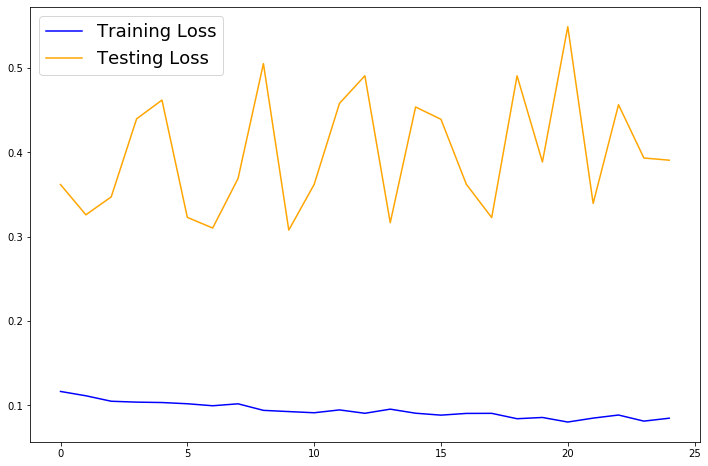

In [14]:
# Check out our train loss and test loss over epochs.
train_loss = model2.history['loss']
test_loss = model2.history['val_loss']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.legend(fontsize = 18);

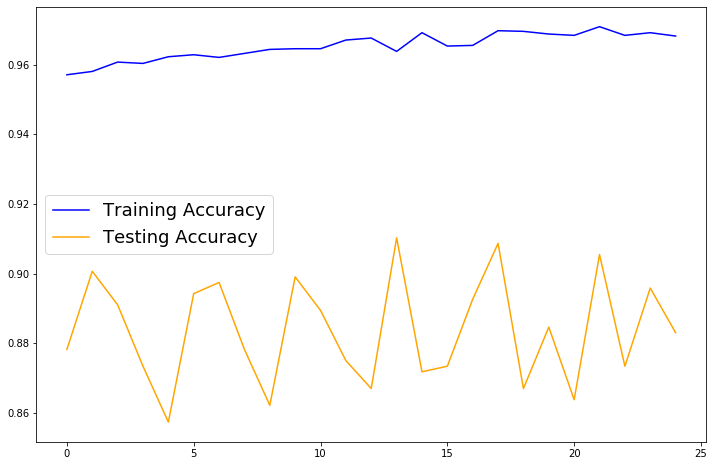

In [15]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = model2.history['accuracy']
test_accuracy = model2.history['val_accuracy']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')
plt.legend(fontsize = 18);

Evaluate, Improving, and Tuning the CNN